# Machine Learning for Predictive Analytics Mini Sprint

In [2]:
# Here we import all our libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import graphviz
import seaborn as sns
from IPython.display import Image
from pandas.api import types 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, plot_importance, plot_tree

# Set the path to the data and unzip it
data_path = '../data/predictive-analytics-sprint/'

In [ ]:
zip_file = 'data.zip'
!unzip -o {data_path + zip_file} -d {data_path}

## Cleaning and Preprocessing Data

In [4]:
# Load the data
general_data = pd.read_csv(data_path + 'general_data.csv')
# We swap the columns 'EmployeeID' and 'Age' to make the data more readable
cols = list(general_data.columns)
a, b = cols.index('EmployeeID'), cols.index('Age')
cols[b], cols[a] = cols[a], cols[b]
general_data = general_data[cols]

employee_survey_data = pd.read_csv(data_path + 'employee_survey_data.csv')
manager_survey_data = pd.read_csv(data_path + 'manager_survey_data.csv')

display(general_data.head() , employee_survey_data.head() , manager_survey_data.head())

,EmployeeID,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Age,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,1,No,Travel_Rarely,Sales,6,2,Life Sciences,1,51,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,2,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,31,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,3,No,Travel_Frequently,Research & Development,17,4,Other,1,32,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,4,No,Non-Travel,Research & Development,2,5,Life Sciences,1,38,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,5,No,Travel_Rarely,Research & Development,10,1,Medical,1,32,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


In [5]:
# Here we merge all three data frames into oneon the employee column
data = pd.merge(general_data, employee_survey_data, on='EmployeeID')
data = pd.merge(data, manager_survey_data, on='EmployeeID')
display(data.head())

,EmployeeID,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Age,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,No,Travel_Rarely,Sales,6,2,Life Sciences,1,51,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,2,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,31,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,3,No,Travel_Frequently,Research & Development,17,4,Other,1,32,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,4,No,Non-Travel,Research & Development,2,5,Life Sciences,1,38,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,5,No,Travel_Rarely,Research & Development,10,1,Medical,1,32,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3


In [ ]:
# We can save the data to a csv file  for later use
data.to_csv(data_path + 'employee_data.csv', index=False)

In [6]:
# Loop through the columns and convert the non-numeric columns to numeric
for column in data.columns:
  # Check if the data type is not an integer or a float
  if not types.is_numeric_dtype(data[column]):
    # One hot encode the column with numerical categories
    data[column] = pd.Categorical(data[column])
    data[column] = data[column].cat.codes
data.head()

,EmployeeID,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Age,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,0,2,2,6,2,1,1,51,0,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,2,1,1,1,10,1,1,1,31,0,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,3,0,1,1,17,4,4,1,32,1,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,4,0,0,1,2,5,1,1,38,1,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,5,0,2,1,10,1,3,1,32,1,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3


In [7]:
# Create a MinMaxScaler object
scaler = MinMaxScaler()
# Select the columns to normalize (excluding 'Attrition')
columns_to_normalize = data.columns[data.columns != 'Attrition']
# Normalize the selected columns
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])
data.head()

,EmployeeID,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Age,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,0.000000,0,1.0,1.0,0.178571,0.25,0.2,0.0,0.785714,0.0,...,0.025,1.000000,0.025,0.000000,0.000000,0.666667,1.000000,0.333333,0.666667,0.0
1,0.000227,1,0.5,0.5,0.321429,0.00,0.2,0.0,0.309524,0.0,...,0.150,0.500000,0.125,0.066667,0.235294,0.666667,0.333333,1.000000,0.333333,1.0
2,0.000454,0,0.5,0.5,0.571429,0.75,0.8,0.0,0.333333,1.0,...,0.125,0.333333,0.125,0.000000,0.176471,0.333333,0.333333,0.000000,0.666667,0.0
3,0.000680,0,0.0,0.5,0.035714,1.00,0.2,0.0,0.476190,1.0,...,0.325,0.833333,0.200,0.466667,0.294118,1.000000,1.000000,0.666667,0.333333,0.0
4,0.000907,0,1.0,0.5,0.321429,0.00,0.6,0.0,0.333333,1.0,...,0.225,0.333333,0.150,0.000000,0.235294,1.000000,0.000000,0.666667,0.666667,0.0


## Data Analysis 

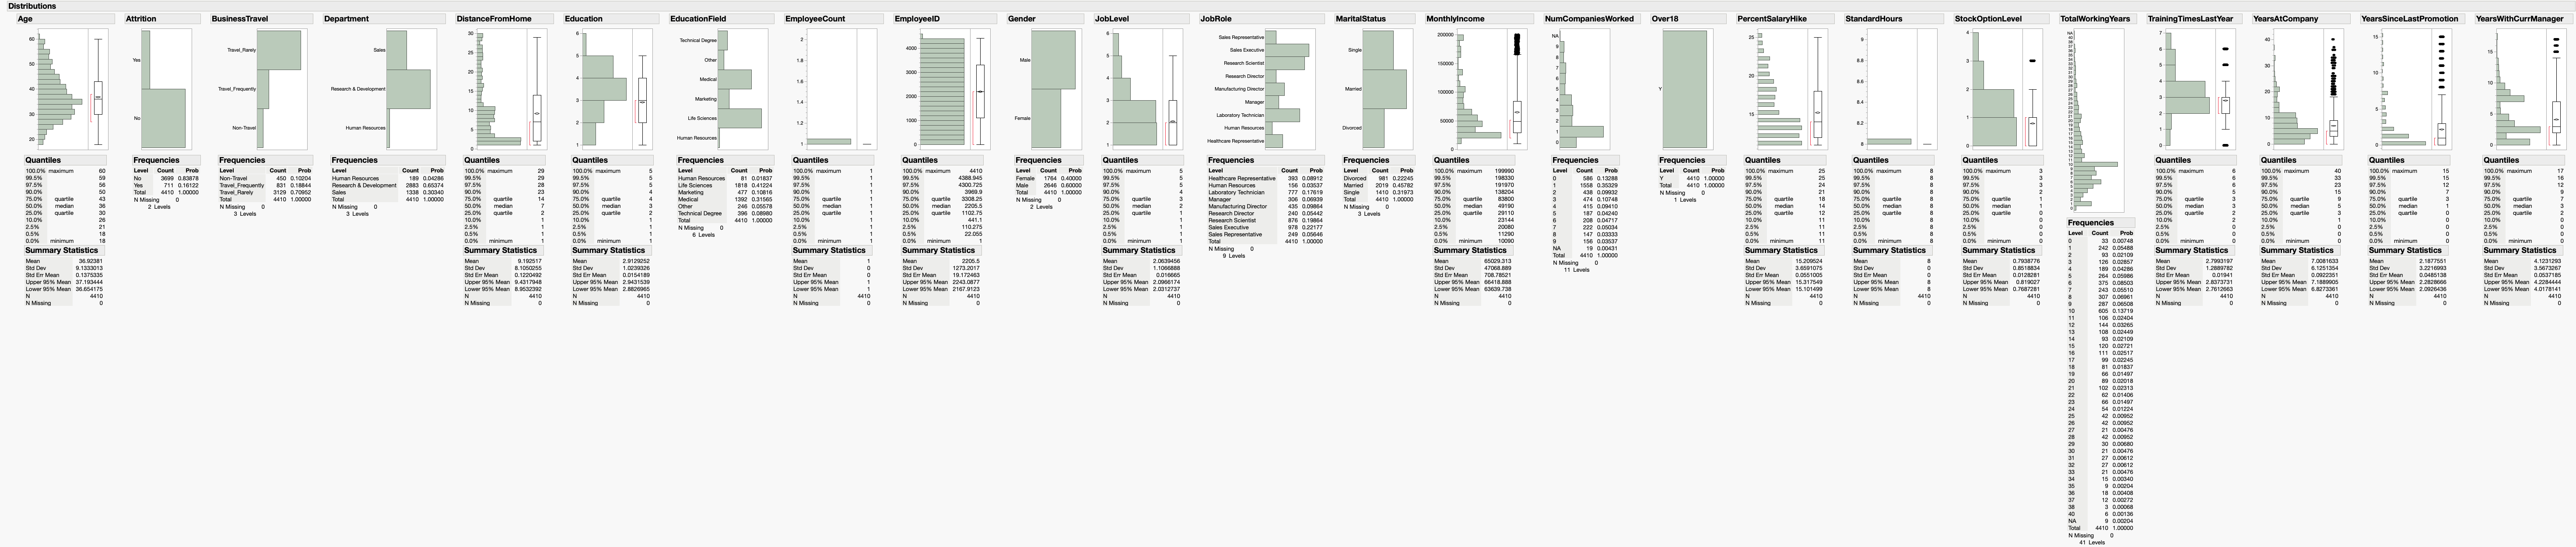

In [8]:
data_description = 'data_description.png'
display(Image(data_path + data_description))

<Axes: >

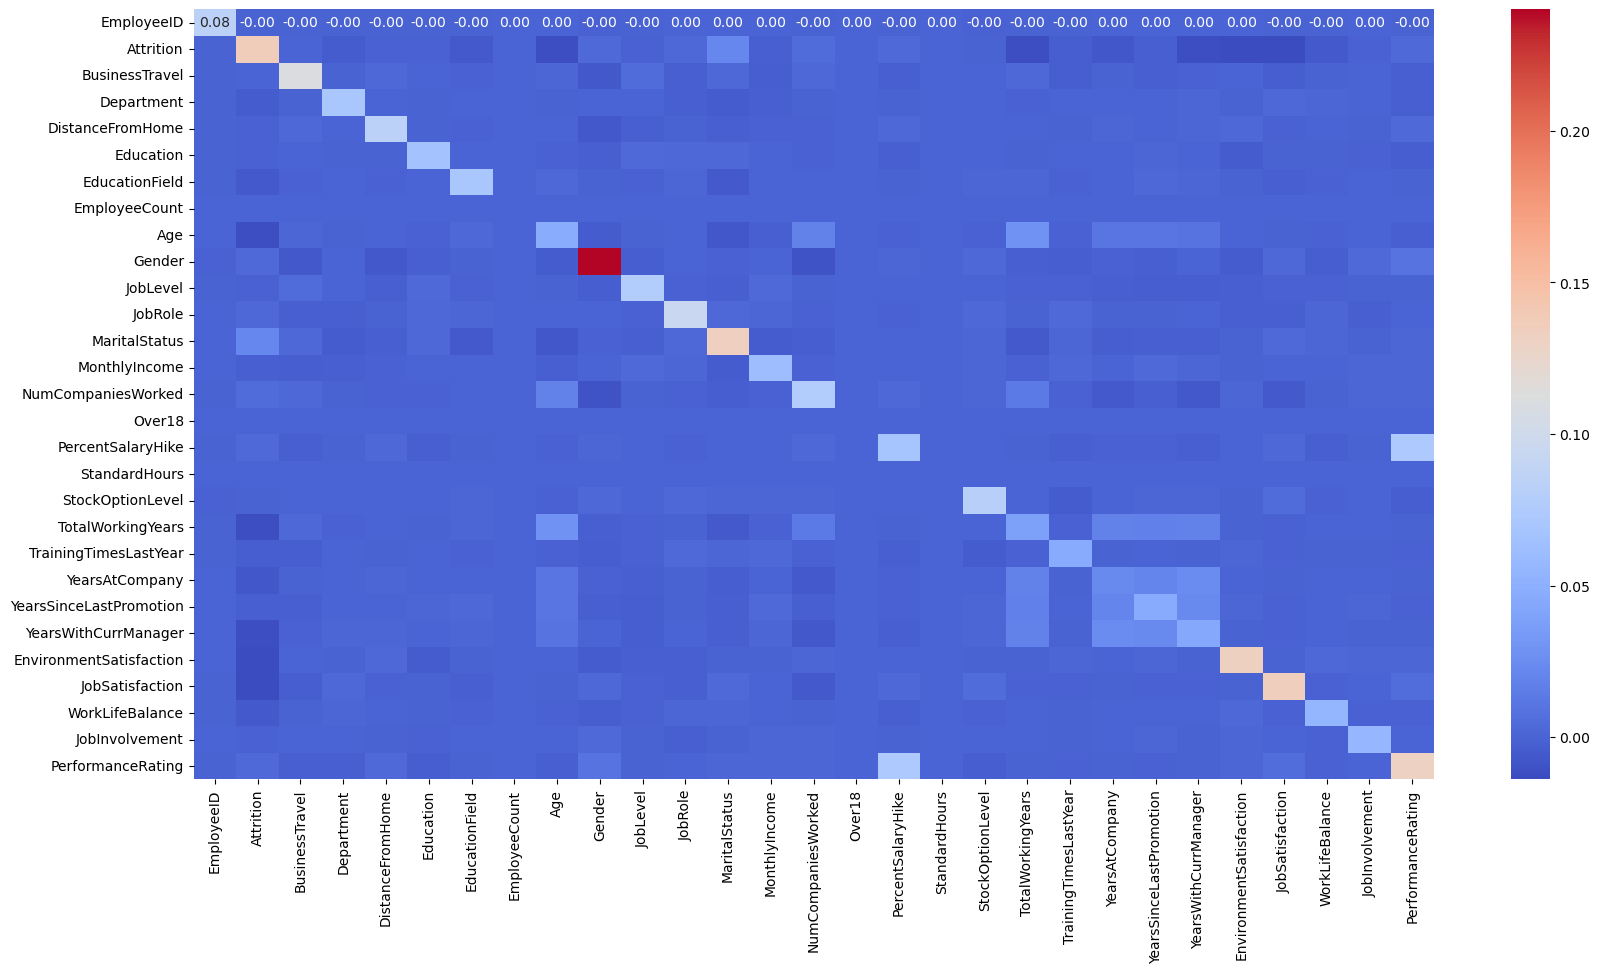

In [9]:
covariance_matrix = data.cov()
plt.figure(figsize=(20, 10))
sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm', fmt='.2f')

In [10]:
drop_columns = ['EmployeeID', 'EmployeeCount', 'Over18', 'StandardHours', 'MaritalStatus', 'Age', 'Over18', 'Gender']
data = data.drop(columns=drop_columns)

## Model Setup

In [11]:
# Split the data into training,testing and validation sets
x_data = data.drop('Attrition', axis=1)
y_data = data['Attrition']
train_x, test_x, train_y, test_y = train_test_split(x_data, y_data, test_size=0.2, random_state=42)
#test_x, val_x, test_y, val_y = train_test_split(test_x, test_y, test_size=0.5, random_state=42)
display(train_x.shape, test_x.shape)

(3528, 21)

(882, 21)

In [51]:
estimators = 500
max_depth = 3
learning_rate = 0.3
model = XGBClassifier(n_estimators=estimators, max_depth=max_depth, learning_rate=learning_rate, objective='binary:logistic')

## Training and Evaluation

In [52]:
model.fit(train_x, train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [53]:
accuracy = model.score(test_x, test_y)
print("Accuracy:", accuracy)

Accuracy: 0.9931972789115646


## Visualizations and Insights

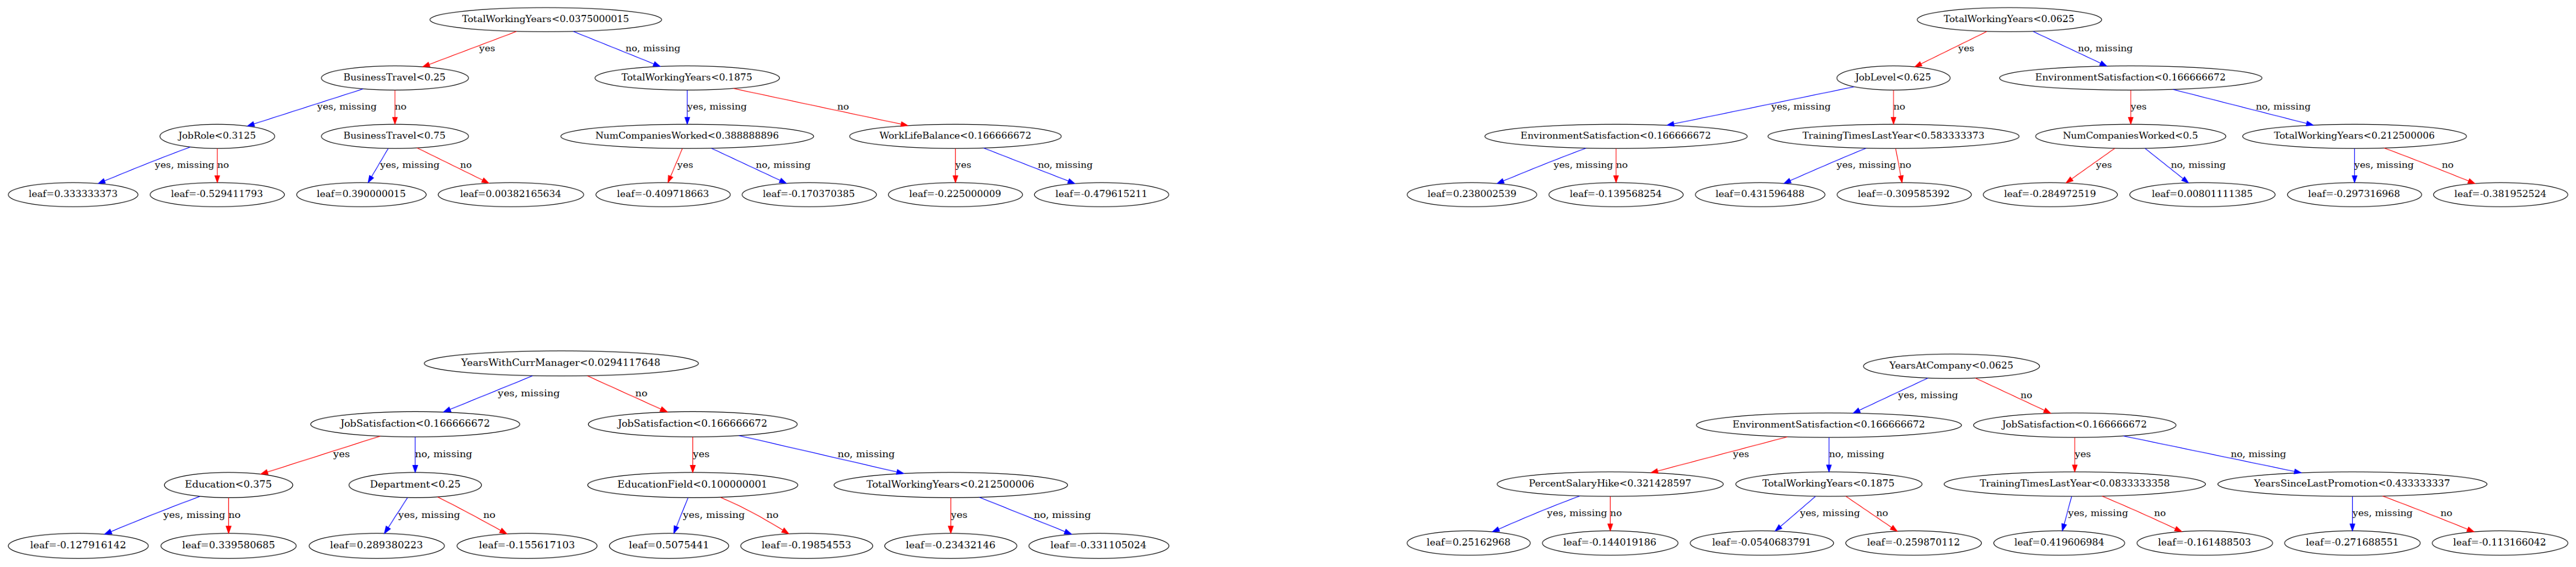

In [54]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(60, 15))
for i in range(4):
    plot_tree(model, num_trees=i, ax=axes[i//2, i%2])
plt.show()

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

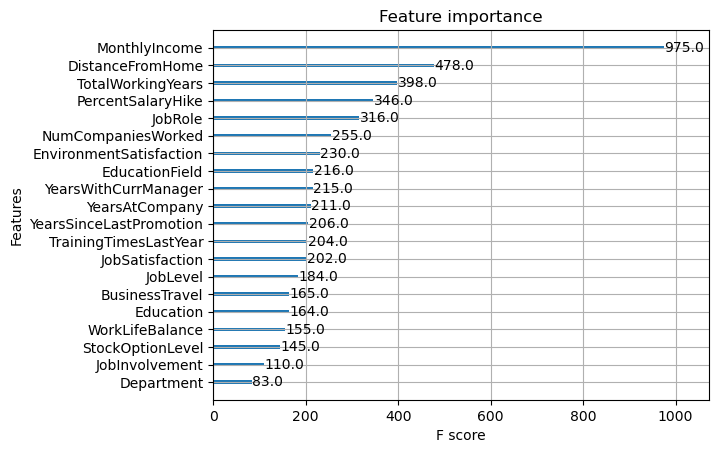

In [33]:
plot_importance(model)